<a href="https://colab.research.google.com/github/AlexaVD/Probability-Analysis/blob/main/EE_381_AI_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Probability in Medical Diagnostics and Sleep Analysis

### Setup and Dataset Exploration

**Step 1: Import Necessary Libraries**

# import necessary libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, geom, hypergeom, poisson, ttest_ind

**Step 2: Load and Inspect the Dataset**

In [12]:
url = '/content/Sleep_health_and_lifestyle_dataset.csv' # Replace with actual dataset URL
df = pd.read_csv(url)

Inspect dataset

In [13]:
print(df.head())
print(df.info())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

Handle missing values
df = df.dropna() # Example: dropping rows with missing values

### Part 1: Probability Distributions (Your Implementation)


**Task 1: Bernoulli and Binomial Models**
- Define a binary outcome for good sleep quality (Quality ≥8).
- Conduct Bernoulli trials and use the Binomial distribution.

In [14]:
df['Good Sleep'] = (df['Quality of Sleep'] >= 8).astype(int)

p_good = df['Good Sleep'].mean()
print("Probability of Good Sleep:", p_good)

from scipy.stats import binom
n = 10
x = 6
prob_binom = binom.pmf(x, n, p_good)
print(f"P(Exactly {x} good sleepers out of {n}):", prob_binom)

Probability of Good Sleep (Bernoulli p): 0.48128342245989303
P(Exactly 6 good sleepers out of 10): 0.18894927204382023


**Task 2: Geometric Distribution**
- Calculate the number of trials until you first observe poor sleep quality (Quality ≤4).

In [15]:
p_poor = (df['Quality of Sleep'] <= 4).mean()
print("Probability of Poor Sleep:", p_poor)

x = 3
prob_geom = geom.pmf(x, p_poor)
print(f"P(First poor sleep on trial {x}):", prob_geom)

Probability of Poor Sleep: 0.013368983957219251
P(First poor sleep on trial 3): 0.01301391392804291


**Task 3: Hypergeometric Distribution**
- Perform hypergeometric sampling for a subgroup (e.g., high stress individuals).

In [17]:
from scipy.stats import hypergeom

N = len(df)

K = len(df[df['Stress Level'] >= 7])

n = 20
x = 5

prob_hyper = hypergeom.pmf(x, N, K, n)
print(f"P(Exactly {x} highly-stressed in sample of {n}):", prob_hyper)

P(Exactly 5 highly-stressed in sample of 20): 0.16080210374552562


**Task 4: Poisson Distribution**
- Simulate the weekly occurrence of poor sleep quality cases.

In [18]:
from scipy.stats import poisson

poor_sleep_count = (df['Quality of Sleep'] <= 4).sum()
lambda_week = poor_sleep_count / len(df) * 7

print("Estimated weekly rate of poor sleep (λ):", lambda_week)

x = 5
prob_poisson = poisson.pmf(x, mu=lambda_week)
print(f"P(Exactly {x} poor sleep cases in a week):", prob_poisson)

Estimated weekly rate of poor sleep (λ): 0.09358288770053476
P(Exactly 5 poor sleep cases in a week): 5.4470132658722964e-08


### Part 2: Bayesian Inference (Your Implementation)
- Update the probability of good sleep quality based on new evidence (e.g., low stress levels).


In [20]:
# Provided Bayesian Function
def bayes(prior, likelihood, evidence):
    return (likelihood * prior) / evidence

prior = (df['Quality of Sleep'] >= 8).mean()

likelihood = len(df[(df['Quality of Sleep'] >= 8) & (df['Stress Level'] <= 3)]) / len(df[df['Quality of Sleep'] >= 8])

evidence = (df['Stress Level'] <= 3).mean()

posterior = bayes(prior, likelihood, evidence)
print("P(Good Sleep | Low Stress):", posterior)


P(Good Sleep | Low Stress): 0.9999999999999999


### Part 3: Hypothesis Testing (Your Implementation)
- Conduct hypothesis testing to compare groups (e.g., low vs high stress levels) in terms of sleep quality.


In [21]:
from scipy.stats import ttest_ind

low_stress = df[df['Stress Level'] <= 3]['Quality of Sleep']
high_stress = df[df['Stress Level'] >= 7]['Quality of Sleep']

t_stat, p_val = ttest_ind(low_stress, high_stress, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Significant difference in sleep quality between stress groups.")
else:
    print("No significant difference found.")


T-statistic: 58.64833547347876
P-value: 1.0309117838295226e-107
Significant difference in sleep quality between stress groups.


### Part 4: Visualization


**Histogram of Sleep Duration**


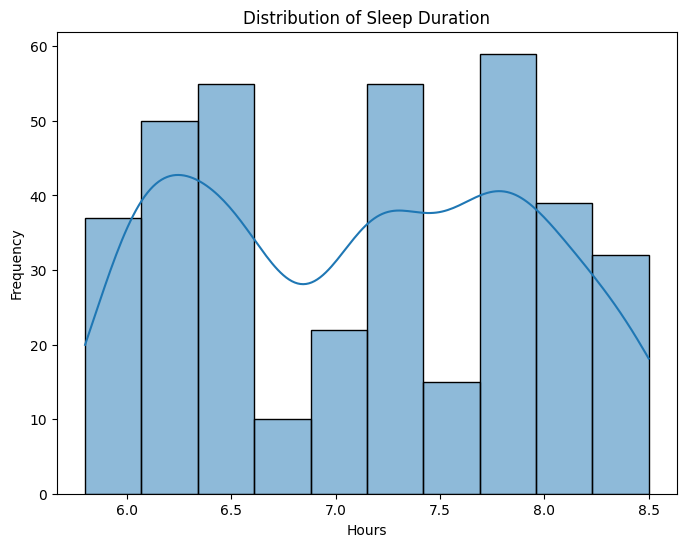

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Duration'], bins=10, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

**Scatter Plot of Physical Activity vs. Sleep Quality**


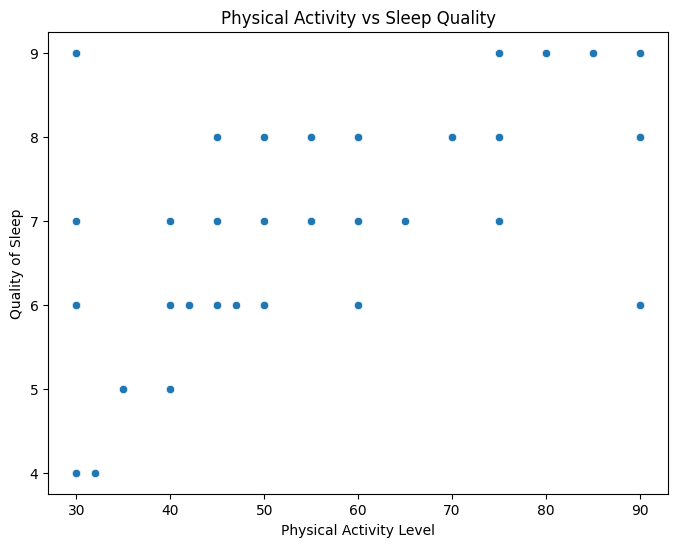

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
plt.title('Physical Activity vs Sleep Quality')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.show()


---

### **Submission Guidelines**
1. Submit your completed notebook (.ipynb file) with all code cells executed.
2. Ensure all markdown cells explain your steps clearly.
3. Include visualizations embedded within the notebook.

---

### Grading Criteria:
- Correct implementation of probability models (30 points).
- Accurate Bayesian inference calculations (20 points).
- Proper hypothesis testing with statistical significance (20 points).
- Quality of visualizations (20 points).
- Documentation and clarity within the notebook (10 points).

---
